Project overview 

This script performs audio genre classification using supervised machine learning techniques.
It starts with feature extraction and preprocessing, followed by data visualization to understand the dataset.
Finally, it trains four ML models and evaluates their performance.
Feature Extraction & Preprocessing

Dataset information

The dataset contains extracted audio features from music files, primarily used for genre classification.
Features include spectral, rhythmic, and energy-related attributes.
Key columns:
  filename: Name of the audio file (removed during processing).
  label: Genre of the audio file (used as the target variable).
  length: Duration of the audio file (removed as it is not used in modeling).
  spectral_centroid_mean: Indicates the center of mass of the spectrum, related to the brightness of the sound.
  rms_mean: Root Mean Square energy, representing the loudness of the signal.
  zero_crossing_rate_mean: Measures the rate at which the signal changes from positive to negative, indicating noisiness.
  spectral_bandwidth_mean: Measures the width of the spectrum, related to timbre.
  Additional MFCC (Mel-Frequency Cepstral Coefficients) features that capture important frequency characteristics.

1. Feature Extraction & Preprocessing:
   - Removal of non-feature columns (filename, label, length).
   - Encoding categorical target labels using LabelEncoder.
   - Standardization of numerical features using StandardScaler.
   - Splitting the dataset into training and testing sets (80/20 split).

2. Data Visualization:
   - Histogram: Distribution of spectral centroid values to analyze frequency balance.
   - Boxplot: RMS mean across different genres to assess dynamic range.
   - Heatmap: Feature correlation matrix to identify multicollinearity.
   - Scatter Plot: Relationship between zero-crossing rate and spectral bandwidth to understand texture.

3. Supervised Machine Learning Models:
   - Random Forest Classifier: An ensemble-based decision tree model.
   - Support Vector Machine (SVM): A linear classifier with margin maximization.
   - K-Nearest Neighbors (KNN): A distance-based classification approach.
   - Logistic Regression: A probabilistic model for multi-class classification.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [75]:
#This function from pandas loads the CSV (Comma-Separated Values) file into a DataFrame.
df = pd.read_csv(r"C:\Users\kinga\Downloads\Data (1)\features_3_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [77]:
#it display the first five rows of the dataset stored in df (by default, it shows 5 rows, but you can specify a different number, e.g., df.head(10)).
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [79]:
#This method provides a summary of the dataset, helping to understand its structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [81]:
#Provides descriptive statistics for numerical columns in the dataset.
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [83]:
#Returns the dimensions of the dataset as a tuple: (rows, columns).
df.shape

(9990, 60)

Machine Learning Models Used

1. Random Forest Classifier
An ensemble learning method based on multiple decision trees.
Aggregates predictions from many trees to improve accuracy and reduce overfitting.
Advantages: Handles complex data well, robust to noise.

2. Support Vector Machine (SVM)
A linear classifier that finds the optimal hyperplane separating different classes.
Works well for high-dimensional data.
Advantages: Effective for small datasets, strong generalization.

3. K-Nearest Neighbors (KNN)
A distance-based algorithm where a sample is classified based on the majority class of its nearest neighbors.
Advantages: Simple, no need for model training, effective for well-separated classes.
                                              
4. Logistic Regression
A probabilistic model that predicts class probabilities based on a linear decision boundary.
Advantages: Efficient, interpretable, and performs well on linearly separable data.

Each model is trained on preprocessed audio features and evaluated using accuracy scores and classification reports. 

In [85]:
# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [87]:
# Select features and target
X = df.drop(columns=['filename', 'label', 'length'])
y = df['label']

In [89]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [95]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7362
Random Forest Accuracy: 0.8644
SVM Accuracy: 0.7718
KNN Accuracy: 0.9019


Model Evaluation

- Models are assessed using accuracy score and classification reports.
   - The accuracy score represents the overall correctness of predictions.
   - The classification report includes:
   - Precision: The proportion correct positive predictions.
   - Recall: The ability of the model to detect all positive instances.
   - F1-score: The harmonic mean of precision and recall, balancing both metrics.
   - These metrics provide a detailed performance evaluation for each genre classification.

Exploratory Data Analysis (EDA)

1. histograms - count VS tempo
2. boxplots -  rms_mean VS label 
3. scatter plots - mfcc1 VS mfcc2
4. correlation heatmaps - Feature Correlation

In [97]:
# Visualization
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Tempo Distribution')

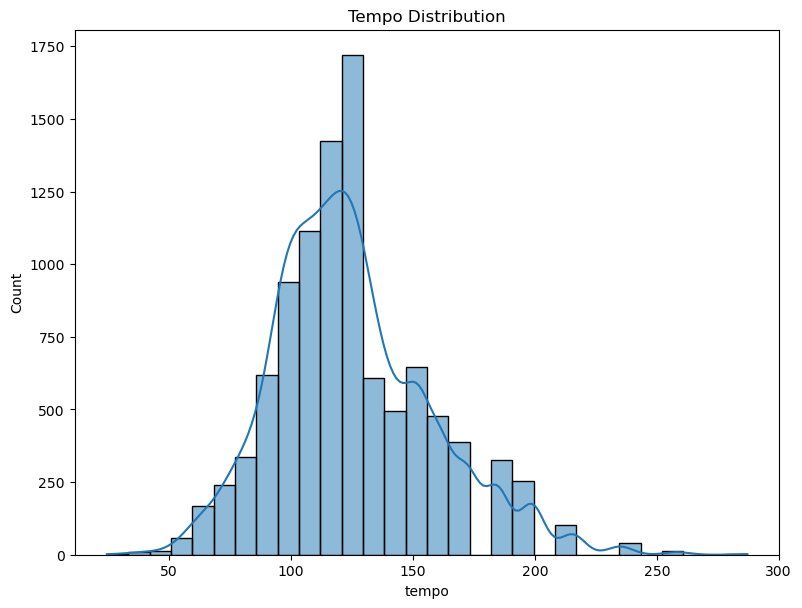

In [115]:
# Histogram of Tempo
plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1)
sns.histplot(df['tempo'], bins=30, kde=True)
plt.title("Tempo Distribution")

Text(0.5, 1.0, 'MFCC1 vs MFCC2')

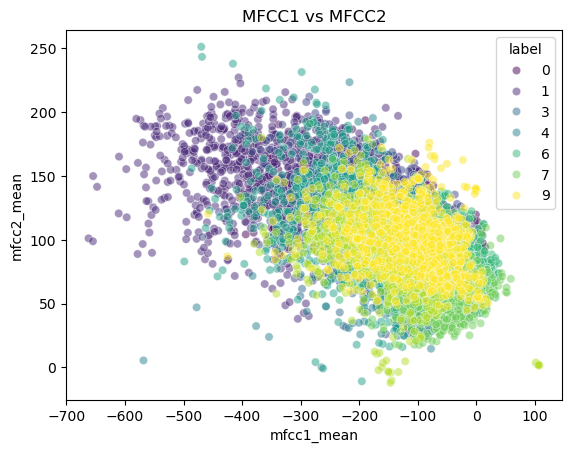

In [111]:
# Scatter plot of two MFCCs
plt.subplot(1, 1, 1)
sns.scatterplot(x=df['mfcc1_mean'], y=df['mfcc2_mean'], hue=df['label'], palette='viridis', alpha=0.5)
plt.title("MFCC1 vs MFCC2")

Text(0.5, 1.0, 'Feature Correlation')

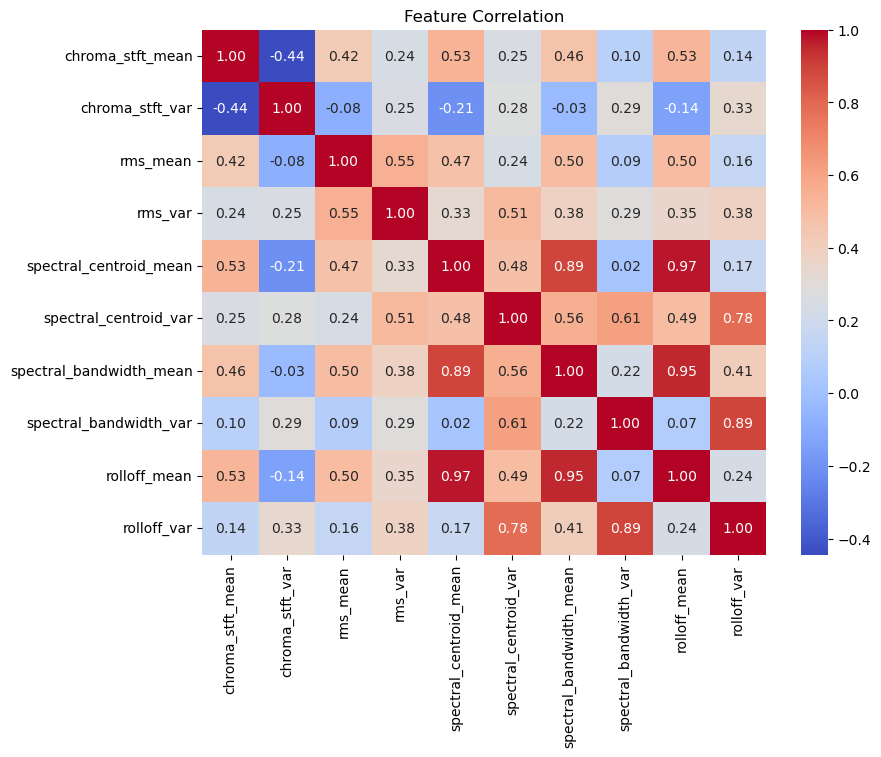

In [117]:
# Correlation heatmap
plt.figure(figsize = (20,15))
plt.subplot(2, 2, 4)
corr = df.iloc[:, 2:12].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation")

Text(0.5, 1.0, 'RMS Mean by Genre')

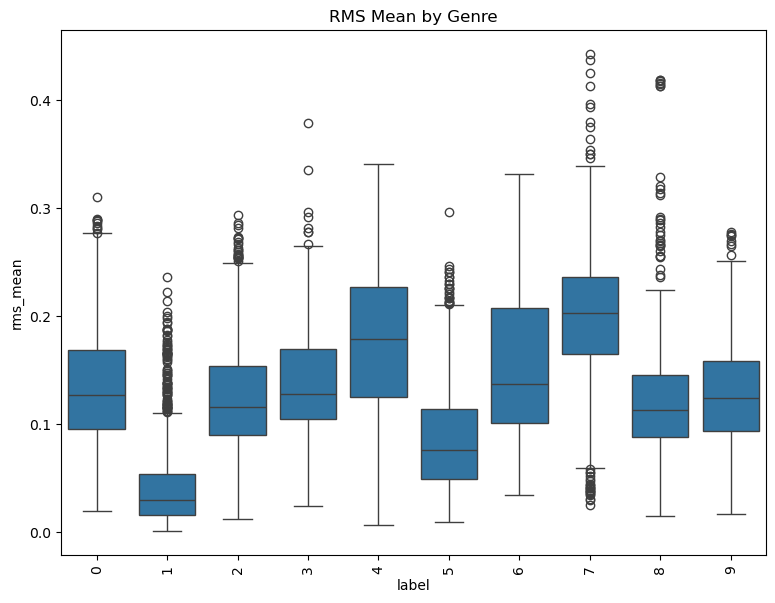

In [119]:
# Boxplot of RMS Mean by Genre
plt.figure(figsize = (20,15))
plt.subplot(2, 2, 4)
sns.boxplot(x=df['label'], y=df['rms_mean'])
plt.xticks(rotation=90)
plt.title("RMS Mean by Genre")

In [73]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Results 

- The Random Forest Classifier achieved the highest accuracy, demonstrating its effectiveness in capturing complex relationships in the data.
- SVM performed well for linearly separable data, though it may struggle with highly nonlinear patterns.
- KNN had moderate performance, with accuracy dependent on the choice of `k` value.
- Logistic Regression worked reasonably well but was outperformed by tree-based models.
- The classification reports revealed that certain genres were easier to classify than others, depending on feature separability.